# Big Data Mart Sales Problem

- Problem Statement:
    
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
#Importing required libraries.

import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#importing Machine Learning models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Data Collection and Information

In [2]:
test = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv")

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [4]:
type(train)

pandas.core.frame.DataFrame

In [5]:
type(test)

pandas.core.frame.DataFrame

In [6]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


we have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis (EDA)

In [10]:
test.shape

(5681, 11)

Test set has 5681 rows and 11 columns.

In [11]:
train.shape

(8523, 12)

Test set has 8523 rows and 12 columns.

In [12]:
train['Item_Outlet_Sales'].unique()

array([3735.138 ,  443.4228, 2097.27  , ..., 7182.6504, 3608.636 ,
       2778.3834])

We have checked the unique values of our target variable "Item_Outlet_Sales" in train dataframe.

In [13]:
# lets check number of unique values in our variable in train dataframe:
train['Item_Outlet_Sales'].nunique()

3493

In [14]:
test['Outlet_Type'].unique()

array(['Supermarket Type1', 'Grocery Store', 'Supermarket Type3',
       'Supermarket Type2'], dtype=object)

We have checked the unique values of our target variable "Outlet_Type" in test dataframe.

In [15]:
# lets check number of unique values in our variable in test dataframe:
test['Outlet_Type'].nunique()

4

In [16]:
# Lets check the duplicate values in our train dataframe:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [17]:
# Lets check the duplicate values in our test dataframe:
test.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Length: 5681, dtype: bool

Lets check the relationship between the variables in train dataframe:

In [18]:
np.corrcoef(train['Item_Weight'], train['Item_Outlet_Sales'])

array([[nan, nan],
       [nan,  1.]])

In [19]:
np.corrcoef(train['Item_Visibility'], train['Item_Outlet_Sales'])

array([[ 1.        , -0.12862461],
       [-0.12862461,  1.        ]])

In [20]:
np.corrcoef(train['Item_MRP'], train['Item_Outlet_Sales'])

array([[1.        , 0.56757445],
       [0.56757445, 1.        ]])

In [21]:
np.corrcoef(train['Outlet_Establishment_Year'], train['Item_Outlet_Sales'])

array([[ 1.        , -0.04913497],
       [-0.04913497,  1.        ]])

In [22]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [24]:
#Checking Information about the data columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- As per above observations we can see that our train dataset is having 4 float datatypes, 1 integer datatype and 7 object datatypes.

In [25]:
#Checking Information about the data columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- As per above observations we can see that our test dataset is having 3 float datatypes, 1 integer datatype and 7 object datatypes.

In [26]:
# Checking Null Values in our dataset train:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
# Checking Null Values in our dataset test:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

- We can clearly see that 'Item_Weight ' & 'Outlet_Size' columns have the null values, that we have to deal with.

In [28]:
# checking the statistics

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [29]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [30]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

In [31]:
test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

- 1.Using the skew method we can see if there is any skewness in our dataset"Train" & "Test" indicating any kind of outliers.
- 2.Whether those outliers are genuine or will need to be treated before creating our machine learning model.
- 3.The acceptable range for skewness is +/-0.5.

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [34]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [35]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


In [36]:
train.nunique()# Checking number of unique values in each column

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [37]:
test.nunique()# Checking number of unique values in each column

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [38]:
# ratio of null values in 'Item_Weight' & 'Outlet_Size' columns in train data
print('Item_Weight: ',train['Item_Weight'].isnull().sum()/train.shape[0] *100,'%')
print('Outlet_Size: ',train['Outlet_Size'].isnull().sum()/train.shape[0] *100,'%')

Item_Weight:  17.165317376510618 %
Outlet_Size:  28.27642848762173 %


In [39]:
# ratio of null values in 'Item_Weight' & 'Outlet_Size' columns in test data
print('Item_Weight: ',test['Item_Weight'].isnull().sum()/test.shape[0] *100,'%')
print('Outlet_Size: ',test['Outlet_Size'].isnull().sum()/test.shape[0] *100,'%')

Item_Weight:  17.180073930646014 %
Outlet_Size:  28.269670832599896 %


- We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively i the given data set.

# EDA - Exploratory Data Analysis

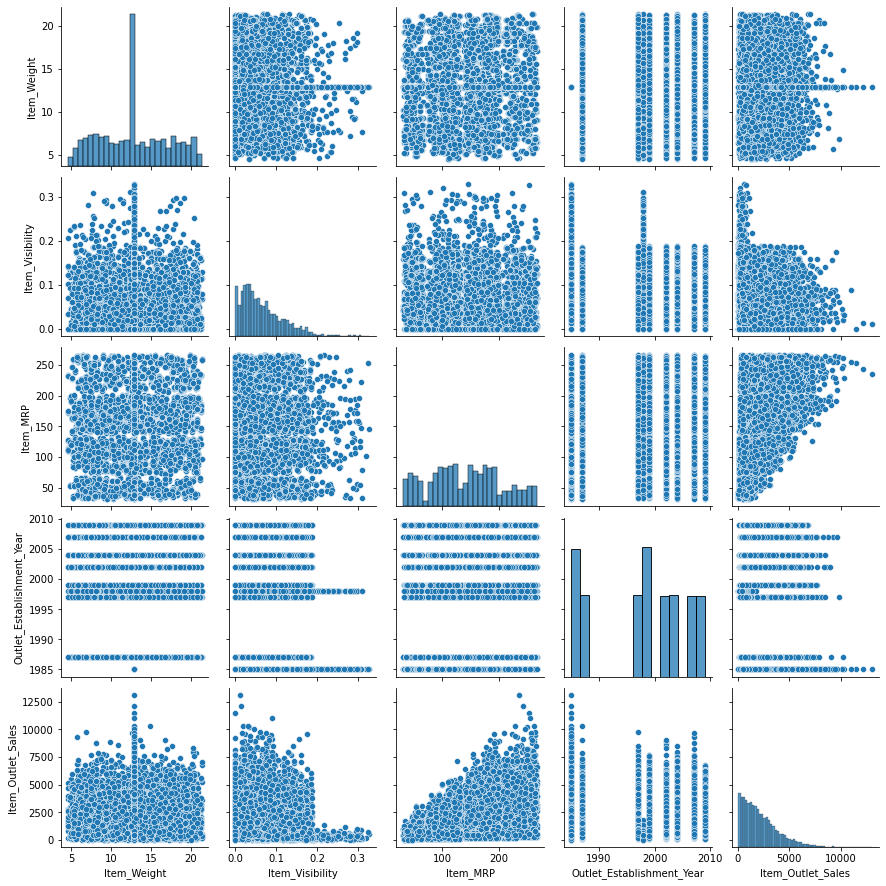

In [49]:
sns.pairplot(train)
plt.show()

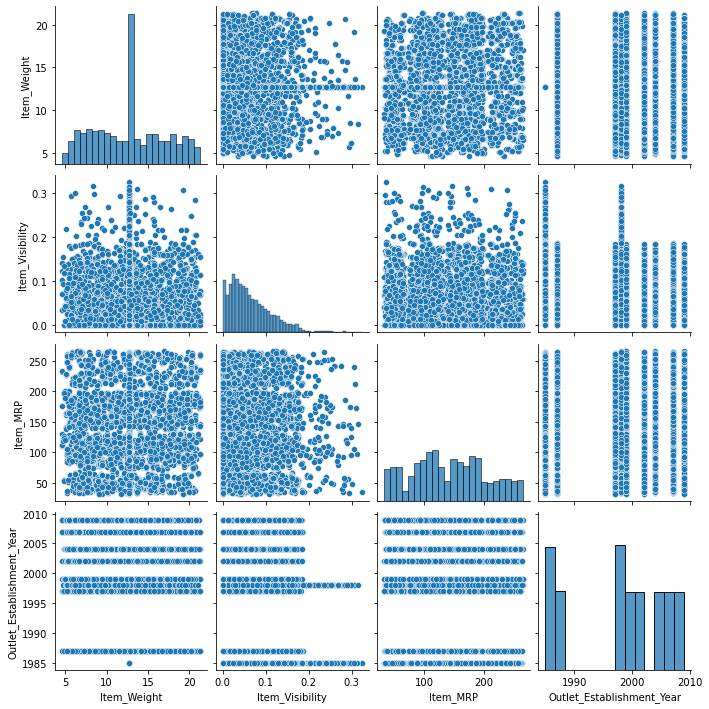

In [50]:
sns.pairplot(test)
plt.show()

In [51]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

### We see there are some irregularities in the column and it is needed to fixed.

In [52]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [53]:
train['Item_Fat_Content']= train['Item_Fat_Content'].astype(str)

In [54]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [55]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2022 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

# Data Cleaning

# 1) Dealing with Null values from column 'Item_Weight':

<AxesSubplot:xlabel='Item_Weight'>

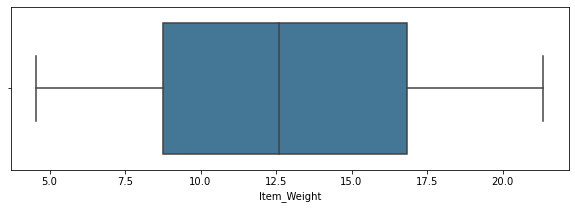

In [40]:
# for train data

plt.figure(figsize=(10,3))
sns.boxplot('Item_Weight',data=train,palette='mako')

<AxesSubplot:xlabel='Item_Weight'>

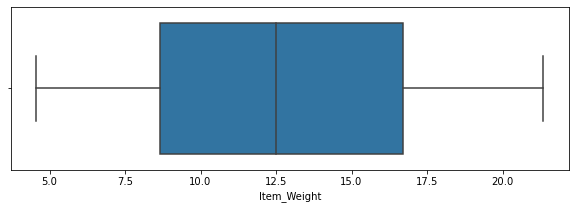

In [41]:
# for test data

plt.figure(figsize=(10,3))
sns.boxplot('Item_Weight',data=test)

- The Box Plots above clearly shows "No Outliers" and hence we can impute the missing values with "Mean" as "Item_Weight" column is having float data.

In [42]:
# Imputing with Mean

train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [43]:
train['Item_Weight'].isnull().sum(), test['Item_Weight'].isnull().sum()

(0, 0)

We have imputed the missing values from the column Item_Weight.

# 2) Dealing with Null values from column 'Outlet_Size':

In [44]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [45]:
print(train['Outlet_Size'].value_counts())
print('\n******************************** \n')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

******************************** 

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


we can impute the missing values by "Mode"(Most Repeated Value) as the outlet_size is a categorical column

In [46]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [47]:
print(train['Outlet_Size'].head())
print("\n*******************************\n")
print(test['Outlet_Size'].tail())

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

*******************************

5676     Small
5677    Medium
5678    Medium
5679    Medium
5680    Medium
Name: Outlet_Size, dtype: object


In [48]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

We have succesfully imputed the missing values from the column Outlet_Size.

# Visualization of Data using countplot

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

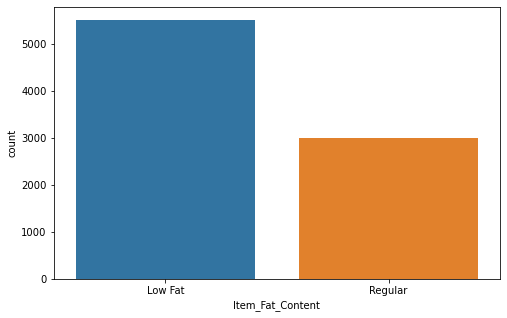

In [56]:
# Item_Fat_Content

plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train)

##### The Items bought are more of Low Fat.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

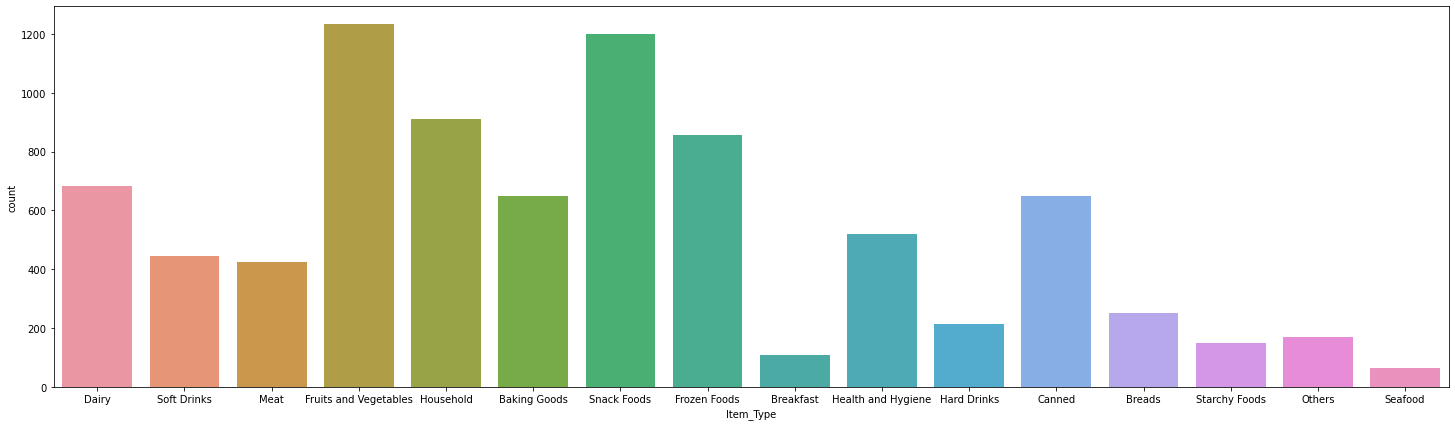

In [58]:
# Item_type

plt.figure(figsize=(25,7))
sns.countplot('Item_Type',data=train)

##### Fruits and Vegetables are largely sold as people tend to use them on daily purpose.
##### Snack Foods too have good sales.

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

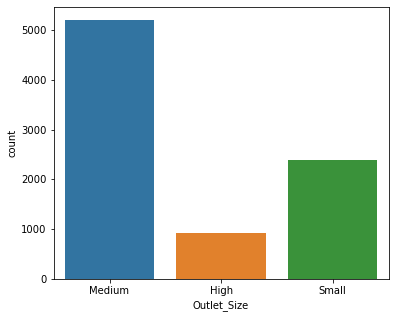

In [59]:
# Outlet_Size

plt.figure(figsize=(6,5))
sns.countplot('Outlet_Size',data=train)

##### The Outlets are more of Medium Size

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

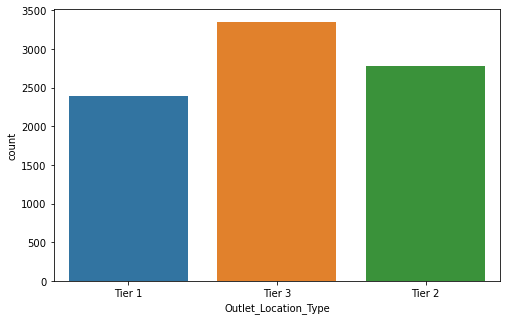

In [60]:
# Outlet_Location_Type

plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train)

##### The Outlets are maximum in number in Tier 3 Cities.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

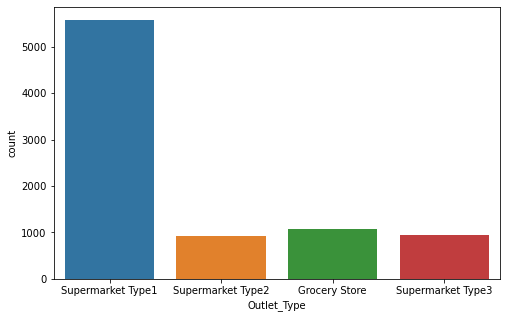

In [61]:
# Outlet_Type

plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train)

##### The Outlets are more of Supermarket Type1.

<AxesSubplot:xlabel='Years_Established', ylabel='count'>

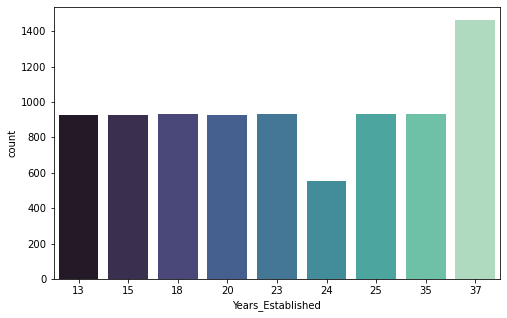

In [62]:
#Years_Established
plt.figure(figsize=(8,5))
sns.countplot('Years_Established',data=train,palette='mako')

##### The Outlets are more of established and running from 35 years.

# Lets check the relationship between all columns with "Item_Outlet_Sales"

In [63]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

# 1. Item Fat Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

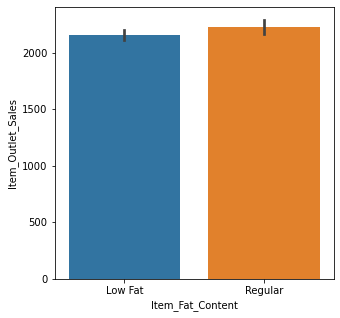

In [64]:
plt.figure(figsize=(5,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train)

##### The Item Outles sales are high for both Low Fat and Regular Item types.

# 2. Item Visibility

Text(0, 0.5, 'Item Visibility')

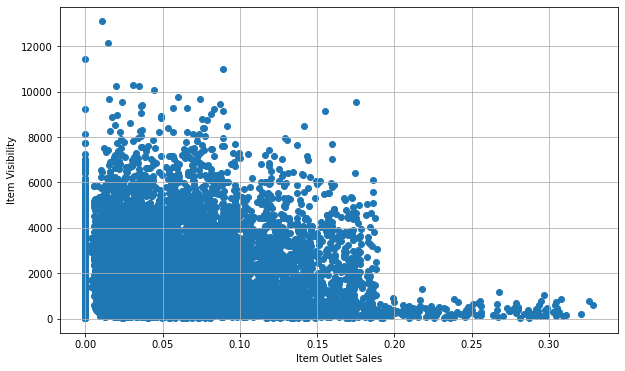

In [65]:
plt.figure(figsize=(10,6))
plt.scatter('Item_Visibility','Item_Outlet_Sales', data=train)
plt.grid()
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

### Item_Visibility has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
### Lets consider it like missing information and impute it with mean visibility of that product.

In [67]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())
test['Item_Visibility'] = test['Item_Visibility'].replace(0,test['Item_Visibility'].mean())

Text(0, 0.5, 'Item Visibility')

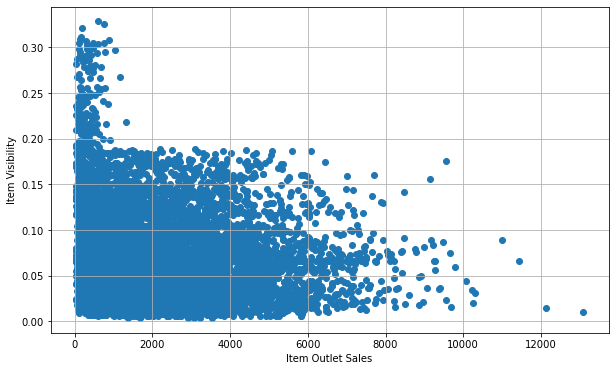

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(y='Item_Visibility',x='Item_Outlet_Sales',data=train)
plt.grid()
plt.xlabel('Item Outlet Sales')
plt.ylabel('Item Visibility')

### We can see that now visibility is not exactly zero and it has some value indicating that Item is rarely purchased by the customers.

# 3. Item Type

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

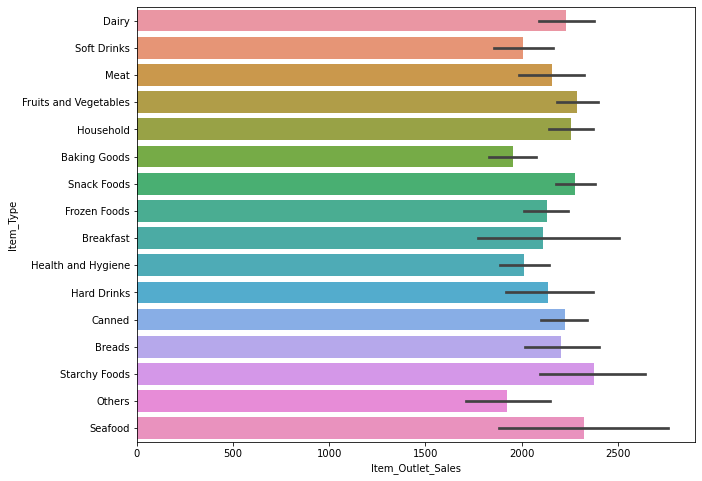

In [69]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train)

### The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

# 4. Item MRP

Text(0, 0.5, 'Item Outlet Sales')

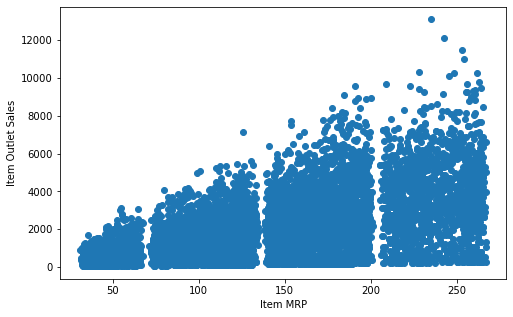

In [70]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

### Items MRP ranging from 200-250 is having high Sales.

# 5. Outlet Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

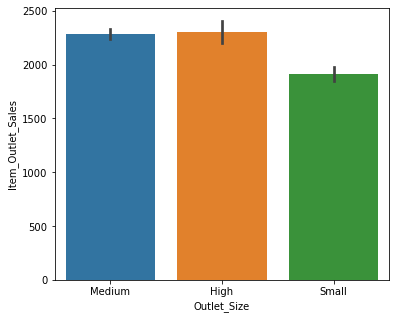

In [71]:
plt.figure(figsize=(6,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

### The Outlet Sales is maximum for Medium and High sized Outlets.
### The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

# 6. Outlet Location Type

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

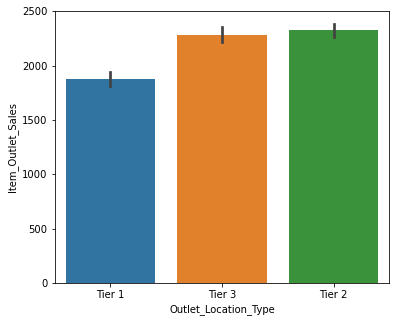

In [72]:
plt.figure(figsize=(6,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)

### The Outlet Sales tend to be high for Tier3 and Tier 2 location types but we have only Tier2 locations maximum Outlets.

# 7. Years Established

<AxesSubplot:xlabel='Years_Established', ylabel='Item_Outlet_Sales'>

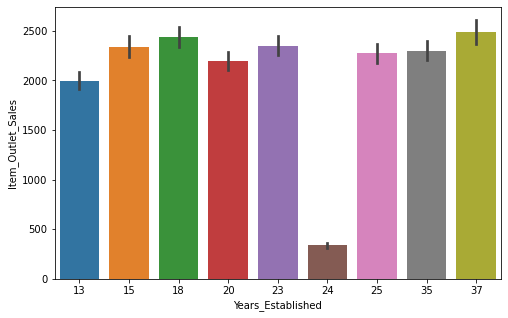

In [73]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=train)

### We can clearly see that Outlets established 35 years ago is having good Sales margin.
### We also have a outlet which was established 22 years ago has the lowest sales margin, so established years wouldn't improve the Sales unless the products are sold according to customer's interest.

# 7 & 8. Item Type & Item Outlet Sales

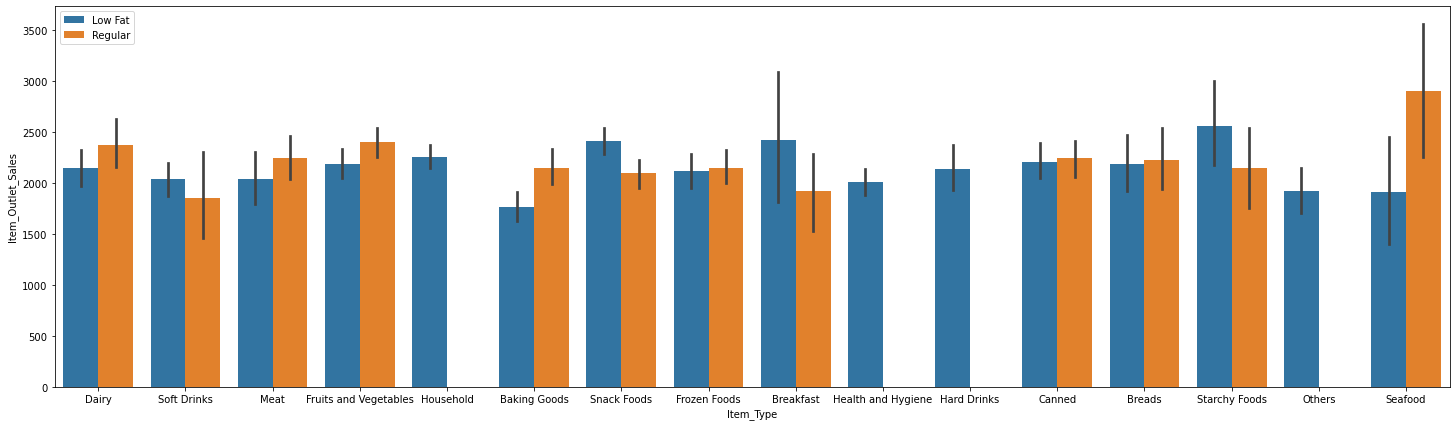

In [74]:
plt.figure(figsize=(25,7))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train)
plt.legend()

# 9 & 10. Outlet Location Type , Item Outlet Sales

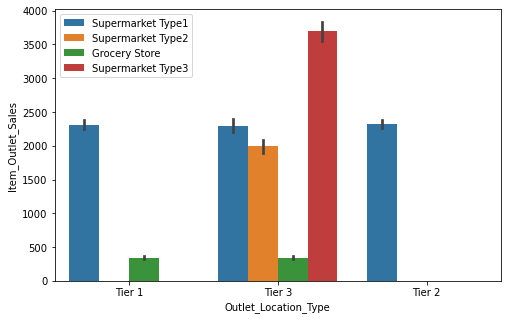

In [75]:
plt.figure(figsize=(8,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train)
plt.legend()

### The Tier-3 location type has all types of Outlet type and has high sales margin.

# Feature Engineering

In [76]:
le = LabelEncoder()
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [77]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,23
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,13
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,23
3,FDX07,19.20,1,0.066132,6,182.0950,OUT010,1998,1,2,0,732.3800,24
4,NCD19,8.93,0,0.066132,9,53.8614,OUT013,1987,0,2,1,994.7052,35


### There are some columns that needs to be dropped as they don't seem helping our analysis.

In [78]:
train.shape, test.shape

((8523, 13), (5681, 12))

There are some columns that needs to be dropped.

In [79]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [80]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

In [81]:
test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Years_Established'],
      dtype='object')

In [82]:
train.shape, test.shape

((8523, 10), (5681, 9))

# Visualization of data using Histogram

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>],
       [<AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Item_Outlet_Sales'}>],
       [<AxesSubplot:title={'center':'Years_Established'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

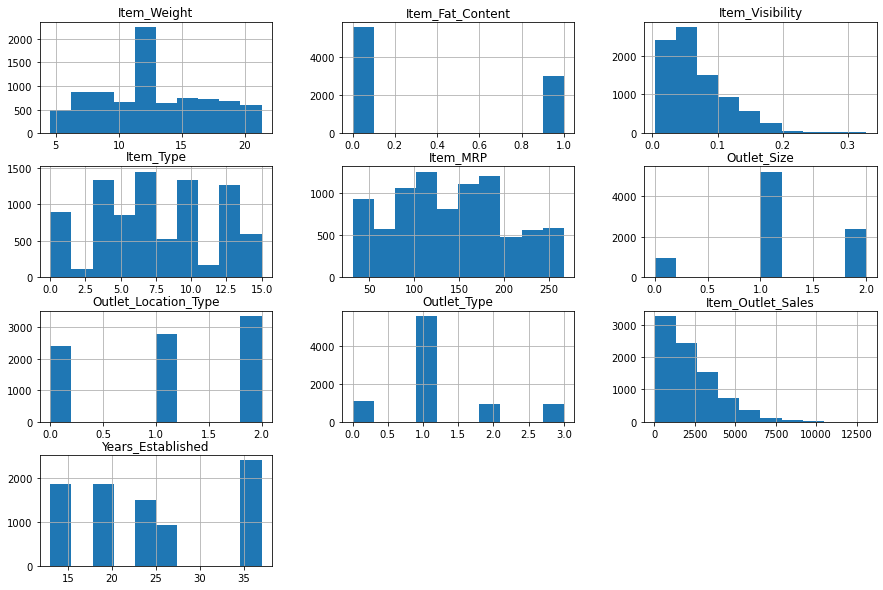

In [83]:
train.hist(figsize=(15,10))

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Fat_Content'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_Type'}>,
        <AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Size'}>],
       [<AxesSubplot:title={'center':'Outlet_Location_Type'}>,
        <AxesSubplot:title={'center':'Outlet_Type'}>,
        <AxesSubplot:title={'center':'Years_Established'}>]], dtype=object)

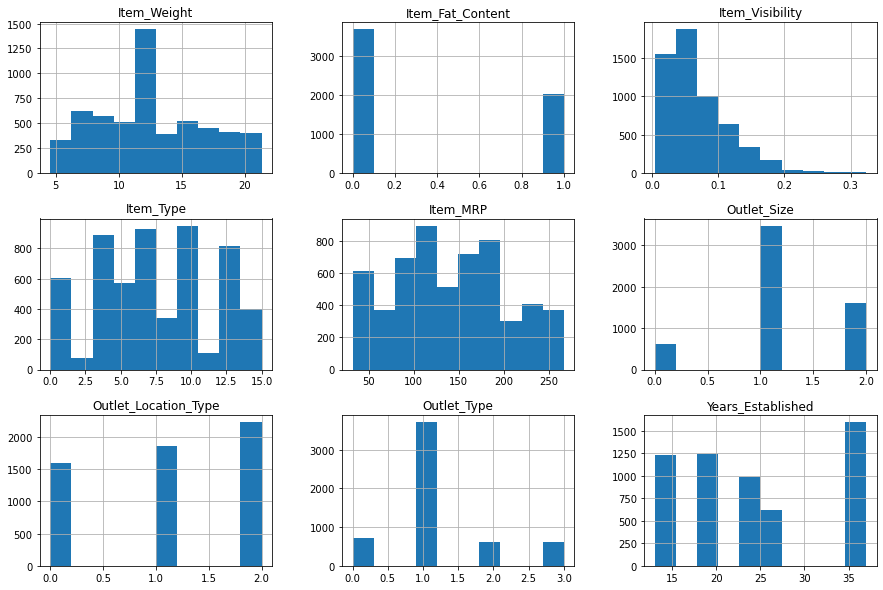

In [84]:
test.hist(figsize=(15,10))

# Visualization of Dataset using Violin Plot

<AxesSubplot:xlabel='Item_Weight'>

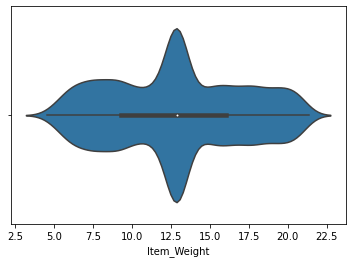

In [88]:
sns.violinplot(x='Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Fat_Content'>

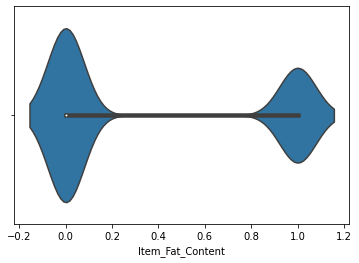

In [89]:
sns.violinplot(x='Item_Fat_Content',data=train)

<AxesSubplot:xlabel='Item_Visibility'>

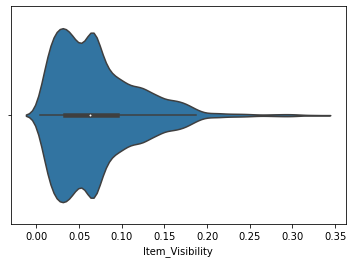

In [90]:
sns.violinplot(x='Item_Visibility',data=train)

<AxesSubplot:xlabel='Item_Type'>

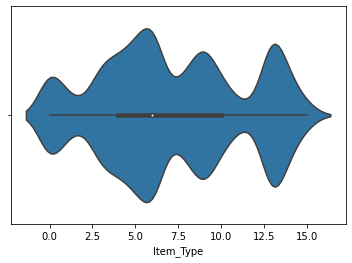

In [91]:
sns.violinplot(x='Item_Type',data=train)

<AxesSubplot:xlabel='Item_MRP'>

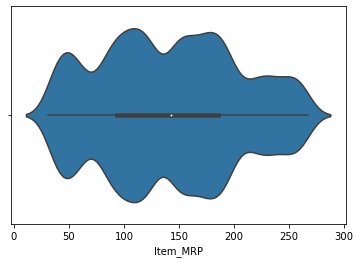

In [92]:
sns.violinplot(x='Item_MRP',data=train)

<AxesSubplot:xlabel='Outlet_Size'>

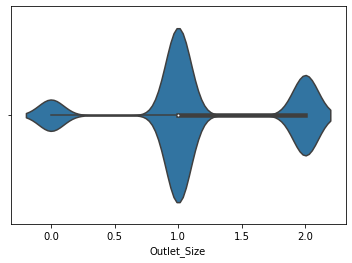

In [93]:
sns.violinplot(x='Outlet_Size',data=train)

<AxesSubplot:xlabel='Outlet_Location_Type'>

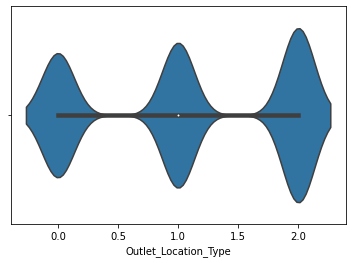

In [94]:
sns.violinplot(x='Outlet_Location_Type',data=train)

<AxesSubplot:xlabel='Outlet_Type'>

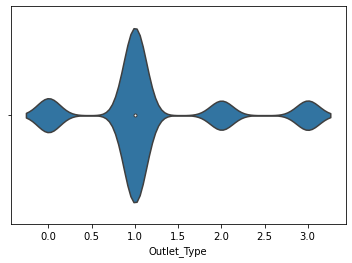

In [96]:
sns.violinplot(x='Outlet_Type',data=train)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

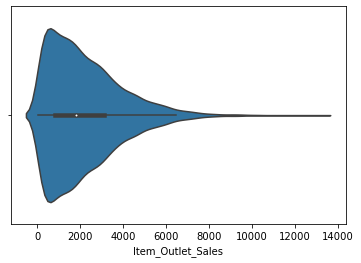

In [97]:
sns.violinplot(x='Item_Outlet_Sales',data=train)

<AxesSubplot:xlabel='Years_Established'>

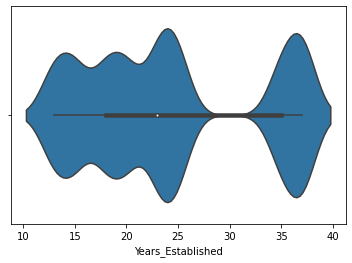

In [98]:
sns.violinplot(x='Years_Established',data=train)

<AxesSubplot:xlabel='Item_Weight'>

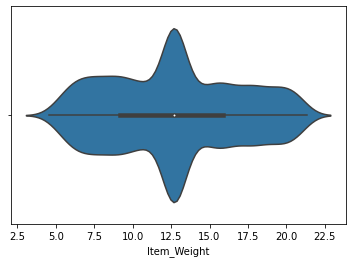

In [99]:
sns.violinplot(x='Item_Weight',data=test)

<AxesSubplot:xlabel='Item_Fat_Content'>

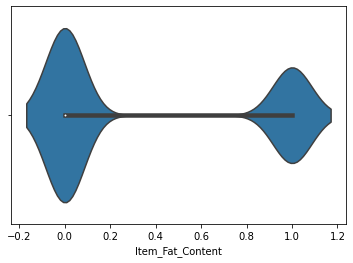

In [100]:
sns.violinplot(x='Item_Fat_Content',data=test)

<AxesSubplot:xlabel='Item_Visibility'>

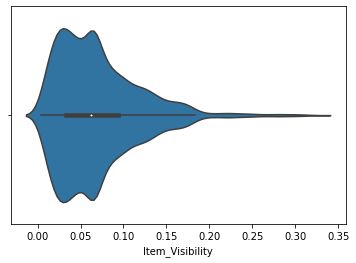

In [101]:
sns.violinplot(x='Item_Visibility',data=test)

<AxesSubplot:xlabel='Item_Type'>

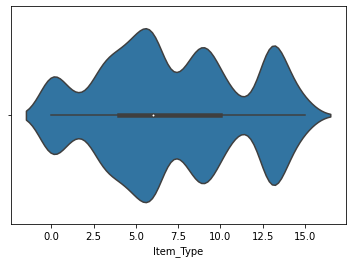

In [102]:
sns.violinplot(x='Item_Type',data=test)

<AxesSubplot:xlabel='Item_MRP'>

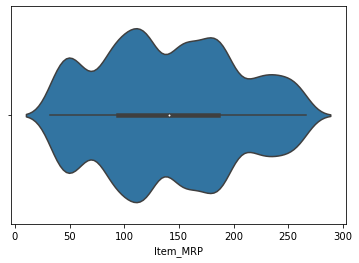

In [103]:
sns.violinplot(x='Item_MRP',data=test)

<AxesSubplot:xlabel='Outlet_Size'>

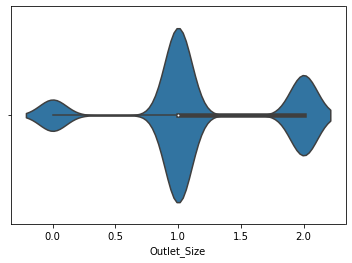

In [104]:
sns.violinplot(x='Outlet_Size',data=test)

<AxesSubplot:xlabel='Outlet_Location_Type'>

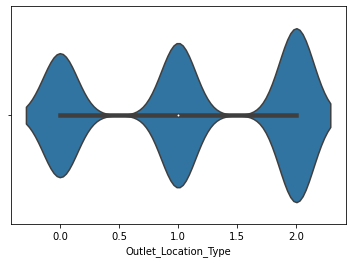

In [105]:
sns.violinplot(x='Outlet_Location_Type',data=test)

<AxesSubplot:xlabel='Outlet_Type'>

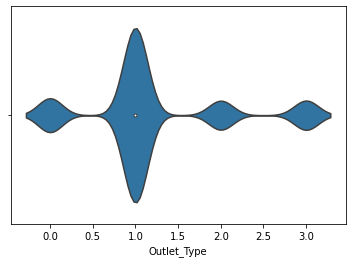

In [106]:
sns.violinplot(x='Outlet_Type',data=test)

<AxesSubplot:xlabel='Years_Established'>

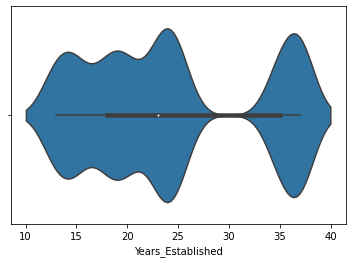

In [107]:
sns.violinplot(x='Years_Established',data=test)

# Visualization of data using stripplot 

<AxesSubplot:xlabel='Item_Weight'>

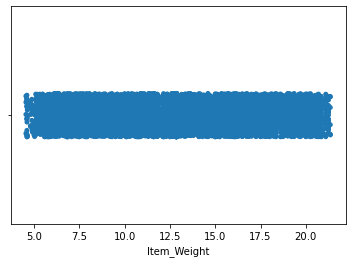

In [123]:
sns.stripplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content'>

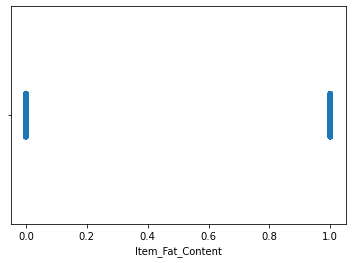

In [124]:
sns.stripplot(train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility'>

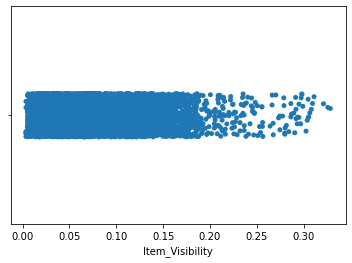

In [125]:
sns.stripplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type'>

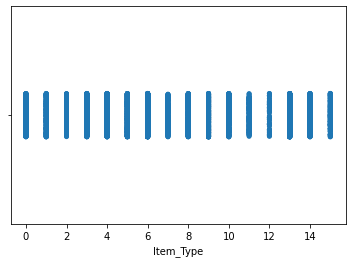

In [126]:
sns.stripplot(train['Item_Type'])

<AxesSubplot:xlabel='Item_MRP'>

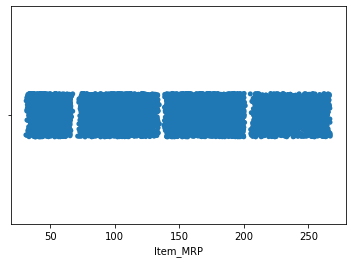

In [127]:
sns.stripplot(train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Size'>

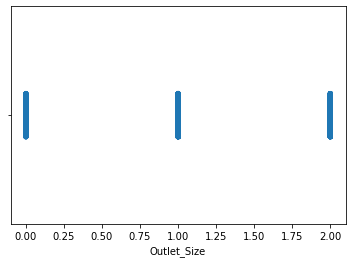

In [128]:
sns.stripplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type'>

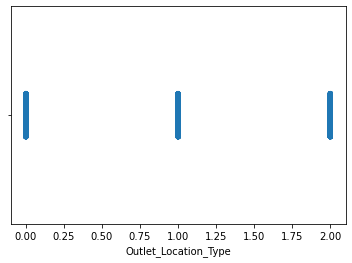

In [129]:
sns.stripplot(train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type'>

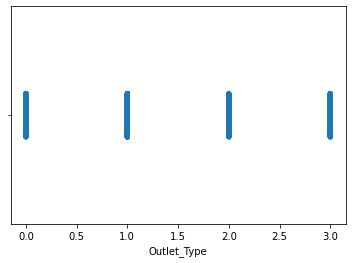

In [130]:
sns.stripplot(train['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

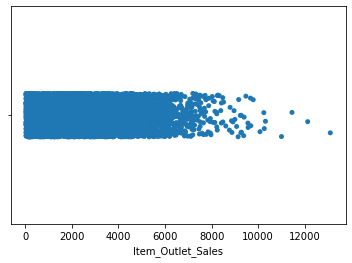

In [131]:
sns.stripplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Years_Established'>

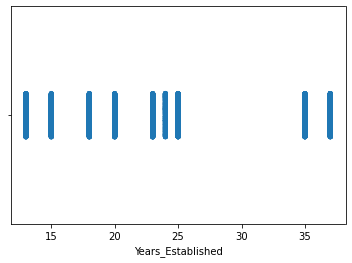

In [132]:
sns.stripplot(train['Years_Established'])

# Visualization of data using boxplot

<AxesSubplot:xlabel='Item_Weight'>

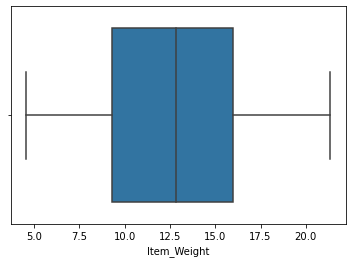

In [135]:
sns.boxplot(train['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content'>

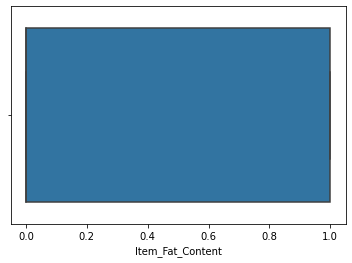

In [136]:
sns.boxplot(train['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility'>

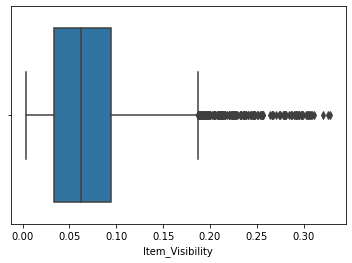

In [137]:
sns.boxplot(train['Item_Visibility'])

<AxesSubplot:xlabel='Item_Type'>

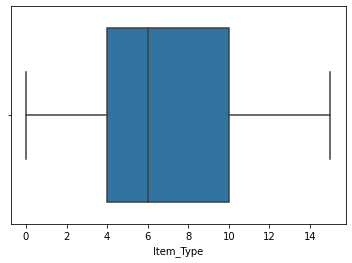

In [138]:
sns.boxplot(train['Item_Type'])

<AxesSubplot:xlabel='Item_MRP'>

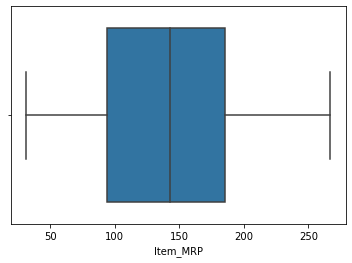

In [139]:
sns.boxplot(train['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Size'>

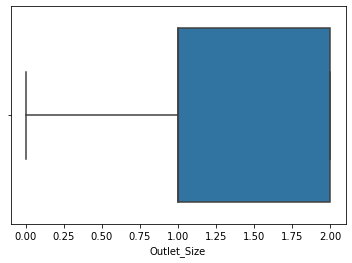

In [140]:
sns.boxplot(train['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type'>

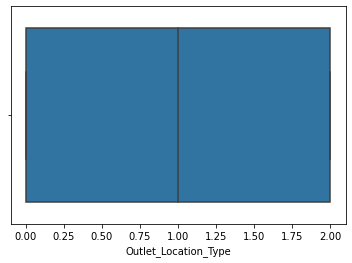

In [141]:
sns.boxplot(train['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type'>

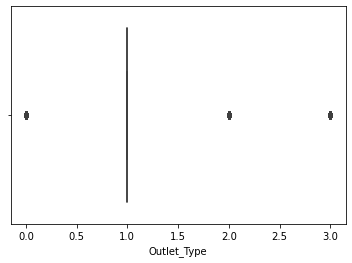

In [142]:
sns.boxplot(train['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

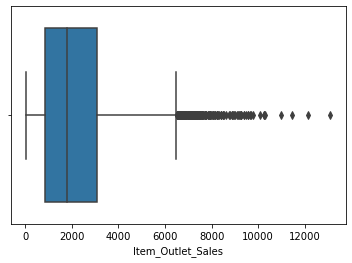

In [143]:
sns.boxplot(train['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Years_Established'>

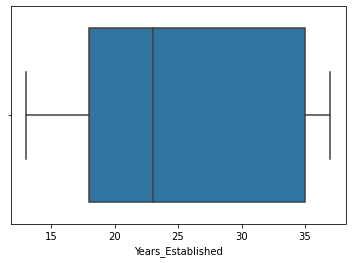

In [144]:
sns.boxplot(train['Years_Established'])

# Correlation using a Heatmap

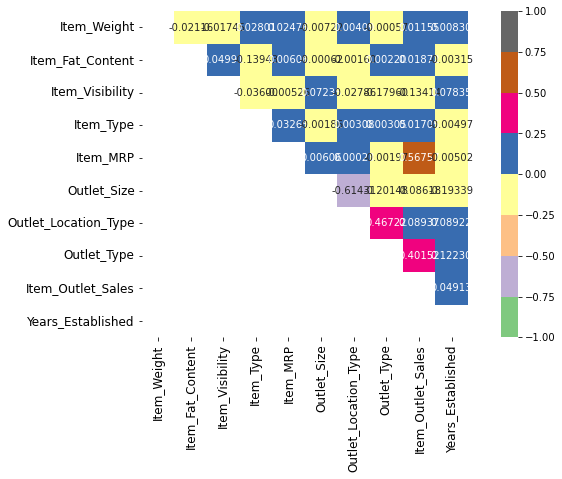

In [109]:
lower_triangle = np.tril(train.corr())
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Accent", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

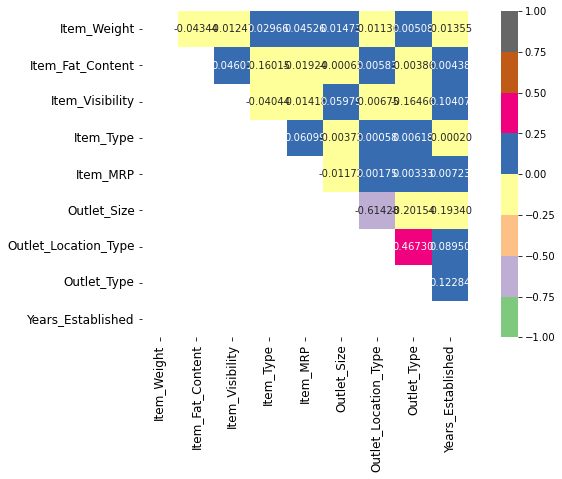

In [110]:
lower_triangle = np.tril(test.corr())
plt.figure(figsize=(12,6))
sns.heatmap(test.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Accent", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [111]:
train.corr

<bound method DataFrame.corr of       Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          4  249.8092   
1           5.920                 1         0.019278         14   48.2692   
2          17.500                 0         0.016760         10  141.6180   
3          19.200                 1         0.066132          6  182.0950   
4           8.930                 0         0.066132          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783         13  214.5218   
8519        8.380                 1         0.046982          0  108.1570   
8520       10.600                 0         0.035186          8   85.1224   
8521        7.210                 1         0.145221         13  103.1332   
8522       14.800                 0         0.044878         14   75.4670   

      Outlet_Size  Outlet_Location_Type  Ou

In [112]:
test.corr

<bound method DataFrame.corr of       Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0       20.750000                 0         0.007565         13  107.8622   
1        8.300000                 1         0.038428          4   87.3198   
2       14.600000                 0         0.099575         11  241.7538   
3        7.315000                 0         0.015388         13  155.0340   
4       12.695633                 1         0.118599          4  234.2300   
...           ...               ...              ...        ...       ...   
5676    10.500000                 1         0.013496         13  141.3154   
5677     7.600000                 1         0.142991         15  169.1448   
5678    10.000000                 0         0.073529          8  118.7440   
5679    15.300000                 1         0.065684          3  214.6218   
5680     9.500000                 1         0.104720          3   79.7960   

      Outlet_Size  Outlet_Location_Type  Ou

# Removing Outliers using z-score

In [113]:
from scipy.stats import zscore

In [114]:
train.shape, test.shape

((8523, 10), (5681, 9))

In [115]:
z=np.abs(zscore(train))
threshold=3
np.where(z>3)

(array([  49,   83,  108,  130,  145,  174,  276,  304,  333,  373,  434,
         456,  472,  502,  521,  532,  661,  694,  753,  809,  847,  854,
         935,  991,  997, 1009, 1138, 1159, 1254, 1272, 1291, 1311, 1324,
        1434, 1450, 1496, 1501, 1506, 1560, 1575, 1644, 1651, 1805, 1827,
        1841, 1859, 1998, 2088, 2109, 2122, 2216, 2238, 2251, 2293, 2324,
        2439, 2445, 2516, 2535, 2586, 2613, 2728, 2776, 2855, 2895, 3017,
        3083, 3087, 3098, 3154, 3206, 3234, 3286, 3399, 3407, 3458, 3474,
        3488, 3497, 3540, 3667, 3709, 3720, 3750, 3757, 3767, 3884, 3993,
        4006, 4219, 4289, 4346, 4349, 4382, 4408, 4530, 4538, 4656, 4674,
        4676, 4681, 4772, 4789, 4888, 4941, 4961, 4987, 4991, 5031, 5050,
        5065, 5150, 5177, 5185, 5223, 5287, 5315, 5374, 5500, 5550, 5619,
        5732, 5734, 5752, 5795, 5799, 5812, 5837, 5880, 5891, 5946, 5977,
        6000, 6008, 6012, 6134, 6179, 6334, 6409, 6536, 6537, 6541, 6576,
        6606, 6622, 6674, 6786, 6886, 

In [116]:
z=np.abs(zscore(test))
threshold=3
np.where(z>3)

(array([  46,   76,   78,   89,  138,  242,  333,  385,  474,  543,  637,
         858,  871, 1046, 1191, 1256, 1270, 1411, 1516, 1547, 1577, 1616,
        1710, 1812, 1823, 1857, 1915, 1919, 2019, 2179, 2230, 2365, 2380,
        2393, 2504, 2516, 2561, 2605, 2609, 2625, 2628, 2652, 2677, 2721,
        2779, 2836, 2837, 2843, 3231, 3267, 3294, 3313, 3316, 3346, 3378,
        3502, 3638, 3679, 3970, 4052, 4147, 4159, 4208, 4255, 4328, 4365,
        4421, 4575, 4616, 4689, 4801, 4804, 4846, 4919, 4976, 4999, 5121,
        5157, 5277, 5290, 5435, 5469, 5482, 5514, 5571, 5668], dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       dtype=int64))

In [119]:
train_new=test[(z<3).all(axis=1)]
train_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,0,0.007565,13,107.8622,1,0,1,23
1,8.300000,1,0.038428,4,87.3198,1,1,1,15
2,14.600000,0,0.099575,11,241.7538,1,2,0,24
3,7.315000,0,0.015388,13,155.0340,1,1,1,15
4,12.695633,1,0.118599,4,234.2300,1,2,3,37
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,0,1,25
5677,7.600000,1,0.142991,15,169.1448,1,2,2,13
5678,10.000000,0,0.073529,8,118.7440,1,1,1,20
5679,15.300000,1,0.065684,3,214.6218,1,1,1,15


In [118]:
test_new=test[(z<3).all(axis=1)]
test_new

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,0,0.007565,13,107.8622,1,0,1,23
1,8.300000,1,0.038428,4,87.3198,1,1,1,15
2,14.600000,0,0.099575,11,241.7538,1,2,0,24
3,7.315000,0,0.015388,13,155.0340,1,1,1,15
4,12.695633,1,0.118599,4,234.2300,1,2,3,37
...,...,...,...,...,...,...,...,...,...
5676,10.500000,1,0.013496,13,141.3154,2,0,1,25
5677,7.600000,1,0.142991,15,169.1448,1,2,2,13
5678,10.000000,0,0.073529,8,118.7440,1,1,1,20
5679,15.300000,1,0.065684,3,214.6218,1,1,1,15


### Percentage Data loss

In [120]:
Data_loss1=((8523-5595)/8523)*100
Data_loss1

34.3541006687786

we can see that our 34% of data from train dataframe is lost when outliers are removed.

In [121]:
Data_loss2=((5681-5595)/5681)*100
Data_loss2

1.51381798979053

We can see that our 1.5% of data is lost from test dataframe when we removed outliers.

# Separating features and target:

In [149]:
# We have separated Dependent and Independet Features

y= train['Item_Outlet_Sales']

x = train.copy()
x.drop('Item_Outlet_Sales',axis=1,inplace=True) 

# Checking the multicollinearity using VIF

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

                feature       VIF
0           Item_Weight  8.304170
1      Item_Fat_Content  1.546355
2       Item_Visibility  3.204197
3             Item_Type  3.771102
4              Item_MRP  5.539092
5           Outlet_Size  5.540542
6  Outlet_Location_Type  4.882357
7           Outlet_Type  4.502406
8     Years_Established  7.682350


# Building Model

### lets Scale the features, so that they can't affect the output

In [151]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [153]:
models=[KNeighborsRegressor(), SVR(), DecisionTreeRegressor(), LinearRegression(), RandomForestRegressor()]

In [156]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

maelist=[]
mselist=[]
rmselist=[]
r2list=[]
def create_model(model):
    m=model
    m.fit(x_train,y_train)
    p=m.predict(x_test)
    
    mae=mean_absolute_error(p,y_test)
    mse=mean_squared_error(p,y_test)
    rmse=np.sqrt(mean_squared_error(p,y_test))
    r2=r2_score(y_test,p)
    
    maelist.append(mae)
    mselist.append(mse)
    rmselist.append(rmse)
    r2list.append(r2)
    
    print("*",m)
    print('Mean absolute error',mae)
    print('Mean squared error',mse)
    print('Root Mean squared error',rmse)
    print('R2 Score',r2,'\n')
    print('----------------------------------------------------------------------------------------------------')

In [157]:
for i in models:
    create_model(i)

* KNeighborsRegressor()
Mean absolute error 964.3265227683285
Mean squared error 1786685.8761984212
Root Mean squared error 1336.669695997639
R2 Score 0.42184510829564636 

----------------------------------------------------------------------------------------------------
* SVR()
Mean absolute error 1159.7871020746973
Mean squared error 2516664.0312551144
Root Mean squared error 1586.3997072790685
R2 Score 0.18563098313485826 

----------------------------------------------------------------------------------------------------
* DecisionTreeRegressor()
Mean absolute error 1123.7883953079179
Mean squared error 2611509.175138834
Root Mean squared error 1616.0164526200945
R2 Score 0.1549399788451451 

----------------------------------------------------------------------------------------------------
* LinearRegression()
Mean absolute error 933.3418289826435
Mean squared error 1561773.775403381
Root Mean squared error 1249.7094763997675
R2 Score 0.4946245671867817 

---------------------

# cross validation score:

In [158]:
from sklearn.model_selection  import cross_val_score

def cross_val(model_name,model,x,y,cv):
    
    scores = cross_val_score(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)*100}')

In [159]:
models

[KNeighborsRegressor(),
 SVR(),
 DecisionTreeRegressor(),
 LinearRegression(),
 RandomForestRegressor()]

In [160]:
# cross validation score for KNeighborsRegressor()
KNN=KNeighborsRegressor()
cross_val(KNN,KNeighborsRegressor(),x,y,5)

KNeighborsRegressor() Scores:
0.44
0.39
0.34
0.42
0.43
Average KNeighborsRegressor() score: 40.0


In [161]:
# cross validation score for SVR()
SVR_rbf=SVR()
cross_val(SVR_rbf,SVR(),x,y,5)

SVR() Scores:
0.18
0.2
0.19
0.19
0.18
Average SVR() score: 19.0


In [162]:
# cross validation score for DecisionTreeRegressor()
DTR=DecisionTreeRegressor()
cross_val(DTR,DecisionTreeRegressor(),x,y,5)

DecisionTreeRegressor() Scores:
0.22
0.1
0.04
0.16
0.19
Average DecisionTreeRegressor() score: 14.000000000000002


In [163]:
# cross validation score for LinearRegression().
LR = LinearRegression(normalize=True)
cross_val(LR,LinearRegression(),x,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.51
Average LinearRegression(normalize=True) score: 51.0


In [164]:
# cross validation score for RandomForestRegressor()
RF=RandomForestRegressor()
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor() Scores:
0.57
0.52
0.52
0.56
0.56
Average RandomForestRegressor() score: 55.00000000000001


# We can see 'Random forest' model clearly did the best among all models!

In [165]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(x_train,y_train)

import pickle
filename = 'Big Data Mart Sales.pkl'
pickle.dump(RF,open (filename,'wb'))

##### Conclusions:
- Item_MRP clearly maximises the Outlet sales.
- Outlet Type being SuperMarket or Grocery Store also depicts the Outlet Sales.
- Years Established will also tend to have loyal customers and thats how the sales margin can be acheived.